In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/DSA WORKS/wee7/Add_sales_data_2018.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


**1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit
generated.**

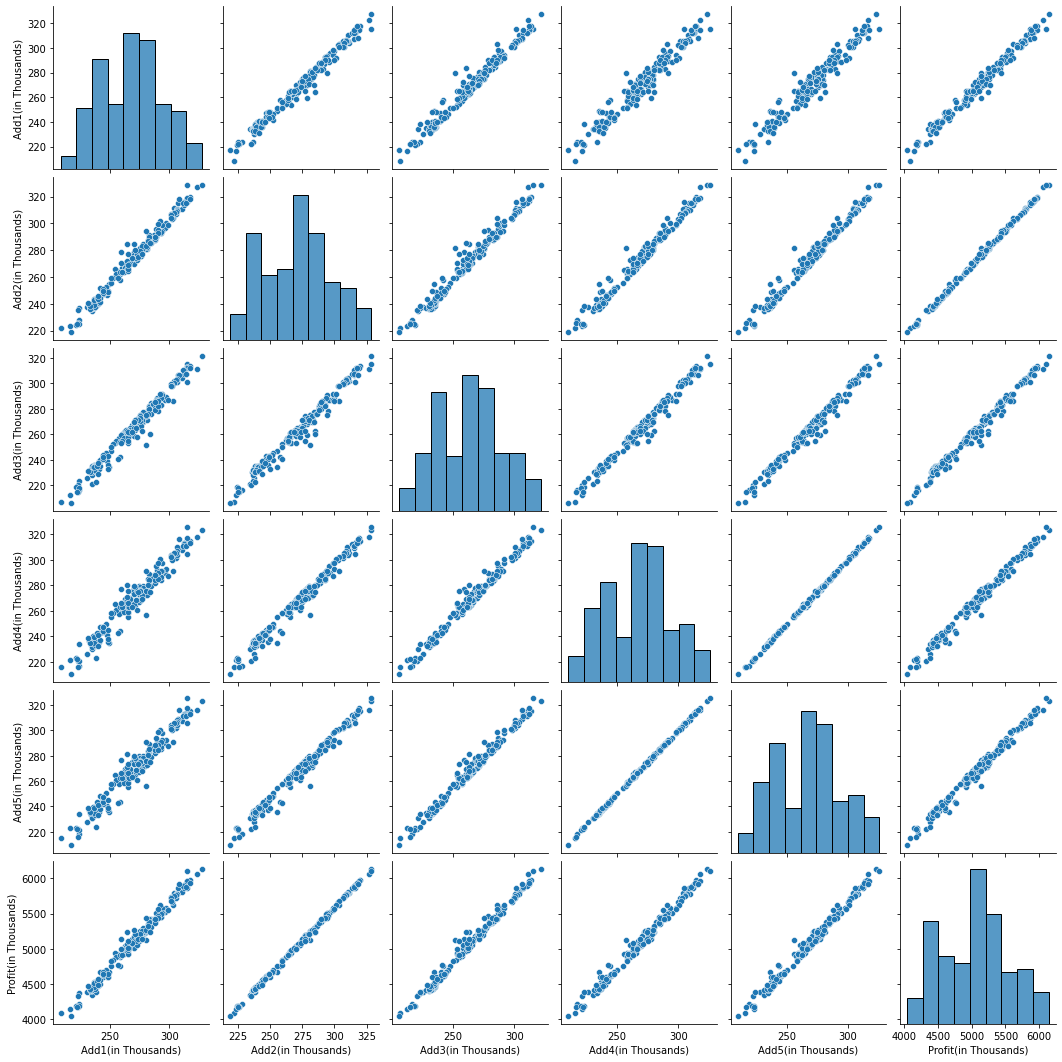

In [7]:
sns.pairplot(data)

As we can see the graphs above we can say that there is a strong relation between the each advertising company and profit generated as we can see for Add2 is having very strong correlation.

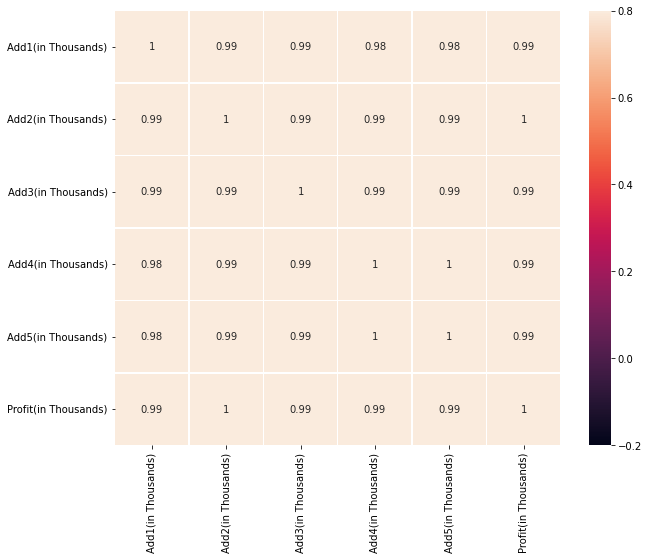

In [8]:
corrdata=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrdata,vmin=-0.2,vmax=0.8,annot=True,linewidths=0.4)

The correlation coefficient are very high which is showing the high correlation of the data, All the coefficent are near one.

**2. Build a regression model to predict the profit from the given data and comment your findings on it.**

In [9]:
data1=data.drop(['Date'],axis=1)
x=data1.drop(['Profit(in Thousands)'],axis=1)
y=data1['Profit(in Thousands)']


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.2)

In [11]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [12]:
y_test.head(5)

26     4451.999
122    5167.878
190    5917.925
43     4672.391
69     5030.451
Name: Profit(in Thousands), dtype: float64

In [13]:
prediction

array([4451.999, 5167.878, 5917.925, 4672.391, 5030.451, 5373.275,
       5133.766, 5175.051, 5177.61 , 5153.977, 5190.814, 5858.34 ,
       5027.633, 4648.834, 4486.996, 5057.155, 5425.19 , 5185.639,
       5182.368, 5580.775, 5065.652, 5212.949, 5728.804, 5263.935,
       4411.775, 5163.693, 6101.648, 5421.94 , 4418.709, 4705.198,
       4643.716, 5498.553, 5107.437, 4453.205, 4836.837, 4647.356,
       5004.282, 5378.379, 4419.421, 5676.934, 5511.42 ])

The Prediction and y_test values are equal

In [14]:
from sklearn.metrics import mean_squared_error as mse
print('MSE IS',mse(y_test,prediction))

MSE IS 9.28056297010714e-25


As the MES is high the prediction will not be accurate

In [15]:
model.score(x_train,y_train)

1.0

**3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.**

In [16]:
predictvalue=[['290','312','309','298','320']]
predictvalue

[['290', '312', '309', '298', '320']]

In [17]:
y=model.predict(predictvalue)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [18]:
y

array([5820.06])

The Predicted value from the given data is **5820.06**. 

Trying SVR model

In [19]:
from sklearn import svm

In [20]:
clf = svm.SVR()
clf.fit(x_train, y_train)
print(clf.predict(x_test))

[5007.52477432 5084.18754583 5095.18066938 5011.45352432 5060.65162487
 5102.80243097 5076.84595327 5085.56474787 5084.69625676 5081.73806645
 5086.12351507 5099.90259252 5060.88977467 5012.73553993 5007.28316355
 5068.07891455 5105.76253082 5086.03453975 5085.44313331 5109.21188963
 5067.16249405 5087.33404329 5105.40757338 5092.00969747 5007.93196001
 5082.13400846 5084.41517991 5105.85033709 5007.7879999  5016.98181988
 5011.98835922 5108.70796107 5069.66065546 5007.24149842 5032.36317841
 5012.76538585 5056.9329003  5104.0652901  5007.74715655 5106.93020794
 5108.65060843]


In [21]:
y_test.head(5)

26     4451.999
122    5167.878
190    5917.925
43     4672.391
69     5030.451
Name: Profit(in Thousands), dtype: float64

In [22]:
clf.predict(predictvalue)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([5096.78176156])

On applying SVR model regression we get, the pridiction value as **5096.781761**